In [67]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [68]:

class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        self.l = np.cross(self.r,self.p)
        self.f = self.m*self.a
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
       
    
        # Fisica
        self.K = 20.
        
        self.VEk = np.zeros(len(t))
        self.Ep = 0.
        self.VEp =np.zeros_like(self.VEk)
        self.Lz= np.zeros_like(self.VEk)
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetAngularMomentum(i)
        self.SetPotential(i)
        
        self.a = self.f/self.m
        
        # Euler
       # self.r += self.dt*self.v
       # self.v += self.dt*self.a
        
        # Euler-Cromer
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        
        
    def CalculateForce(self,p):
        
        d = np.linalg.norm(self.r - p.r)
        
        compresion = self.radius + p.radius - d
        
        if compresion >= 0:
            
            Fn = self.K * compresion**3
            
            self.n = (self.r - p.r)/d     
            self.f = np.add(self.f,Fn*self.n)
            # Falta implementar energía potencial
            
            self.Ep += self.K*((compresion)**4)/4
            
    def SetPotential(self,i):
        self.VEp[i] = self.Ep
                              
     
    # Aca debes agregar la energía potencial
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
        self.Ep = 0.
    
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
        
    
    def SetAngularMomentum(self,i):
        
        """ d_ =(self.r - p.r)
        r_= d_- p.radius * d/np.linalg.norm(d_)
        self.Lz[i] = np.cross(r_,self.p)"""
    
        self.Lz[i]=np.cross(self.r,self.p)
        
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
     
    def GetAngularMomentum(self,scale=1):
        return self.Lz[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
                              
    def GetPotential(self,scale=1):
        return self.VEp[::scale] 
    
    # Debes agregar las paredes en este punto

In [69]:
def GetParticles(N,t):
    
    
    
    # Aca deber agregar una rutina montecarlo para crear particulas
    # sobre el plano con velocidades aleatorias.
    
    Particles = []
    
    r_= np.random.uniform(-20.,20.,[N,2])
    v_=np.random.uniform(-5.,5.,[N,2])
    a_=np.zeros_like(v_)
    
    print(r_)
    
    for i in range(N):
        Particles.append(Particle(r_[i],v_[i],a_[i],t,m=1,radius=2,Id=i))
        
        ##Revisando que particulas no se generen una dentro de otra
        for j in range(i):
                if i!=j and np.linalg.norm(r_[i]-r_[j])<=(Particles[i].radius+Particles[j].radius):
                    
                    r_[j]= np.random.uniform(-20.,20.,2)
                  
                    Particles[i]=(Particle(r_[j],v_[i],a_[j],t,m=1,radius=2,Id=i))
        
    
    return Particles

In [70]:
dt = 0.001
tmax = 10
t = np.arange(0,tmax,dt)

In [71]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [78]:
Particles = GetParticles(10,t)
Particles = RunSimulation(t,Particles)


[[-18.14364395  10.71306728]
 [ -9.47691788 -16.99833673]
 [  2.01109958   9.7527241 ]
 [ 10.11634426  -5.25847006]
 [ 14.08253166 -13.62547484]
 [ 13.97424302  11.79634401]
 [  8.64899812   2.64131157]
 [-13.5254429   12.8846144 ]
 [ -6.81712101  -8.32471044]
 [ -7.56207442  11.38126119]]


Running simulation: 100%|██████████████████████████████████████████████████| 10000/10000 [00:08<00:00, 1136.92 Steps/s]


In [79]:
scale = 200 
t1 = t[::scale]


<IPython.core.display.Javascript object>


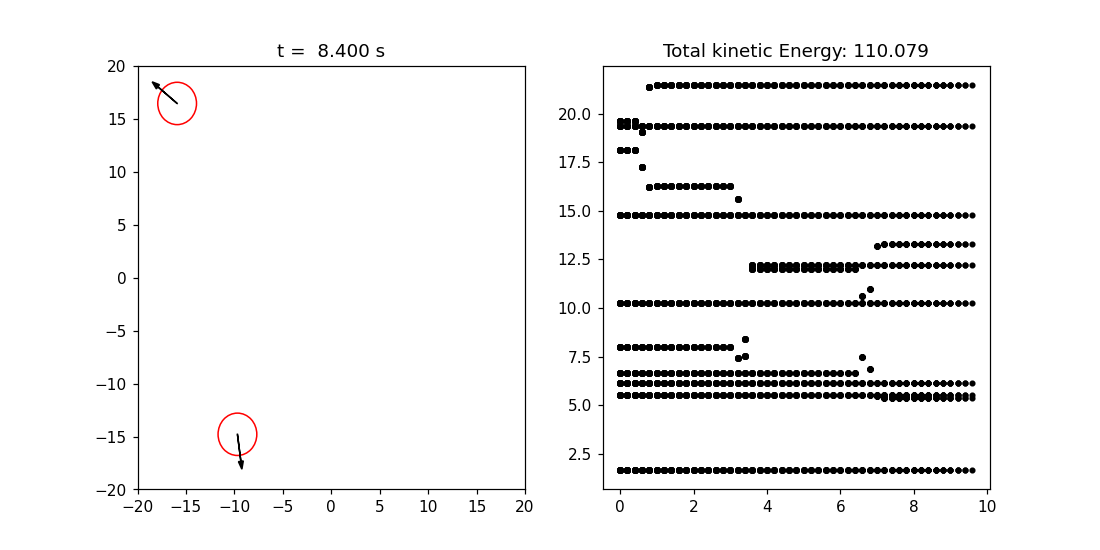

In [80]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

In [82]:
MomentumT = Particles[0].GetMomentum(scale)
for i in range(1,len(Particles)):
    MomentumT = np.add(MomentumT,Particles[i].GetMomentum(scale))
    
KineticT = Particles[0].GetKineticEnergy(scale)
PotentialT = Particles[0].GetPotential(scale)


for i in range(1,len(Particles)):
    KineticT = np.add(KineticT,Particles[i].GetKineticEnergy(scale))
    PotentialT = np.add(PotentialT,Particles[i].GetPotential(scale))
    
PotentialT
KineticT


array([110.0791876 , 110.0791876 , 110.0791876 , 108.64649427,
       109.89860657, 110.0791876 , 110.0791876 , 110.0791876 ,
       110.0791876 , 110.0791876 , 110.0791876 , 110.0791876 ,
       110.0791876 , 110.0791876 , 110.0791876 , 110.0791876 ,
       108.85265128, 101.74449956, 110.07918761, 110.07918761,
       110.07918761, 110.07918761, 110.07918761, 110.07918761,
       110.07918761, 110.07918761, 110.07918761, 110.07918761,
       110.07918761, 110.07918761, 110.07918761, 110.07918761,
       110.06711631, 109.47151639, 109.22427948, 110.02968907,
       110.07918761, 110.07918761, 110.07918761, 110.07918761,
       110.07918761, 110.07918761, 110.07918761, 110.07918761,
       110.07918761, 110.07918761, 110.07918761, 110.07918761,
       110.07918761, 110.07918761])

<IPython.core.display.Javascript object>


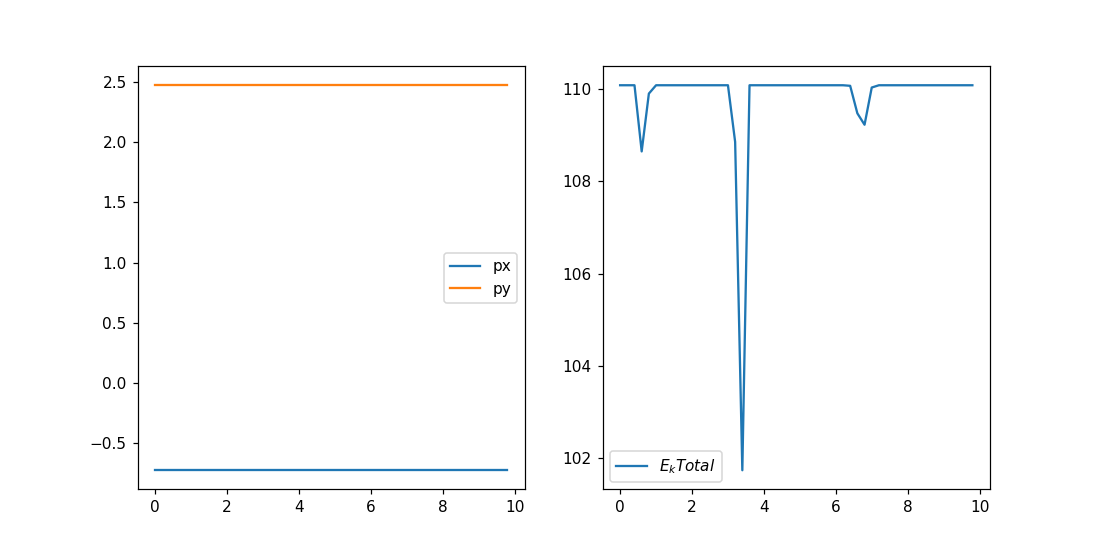

In [83]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(121)
ax3.plot(t1,MomentumT[:,0],label='px')
ax3.plot(t1,MomentumT[:,1],label='py')
ax3.legend()


ax4 = fig3.add_subplot(122)
ax4.plot(t1,KineticT,label='$E_k Total$')
ax4.legend()




<IPython.core.display.Javascript object>


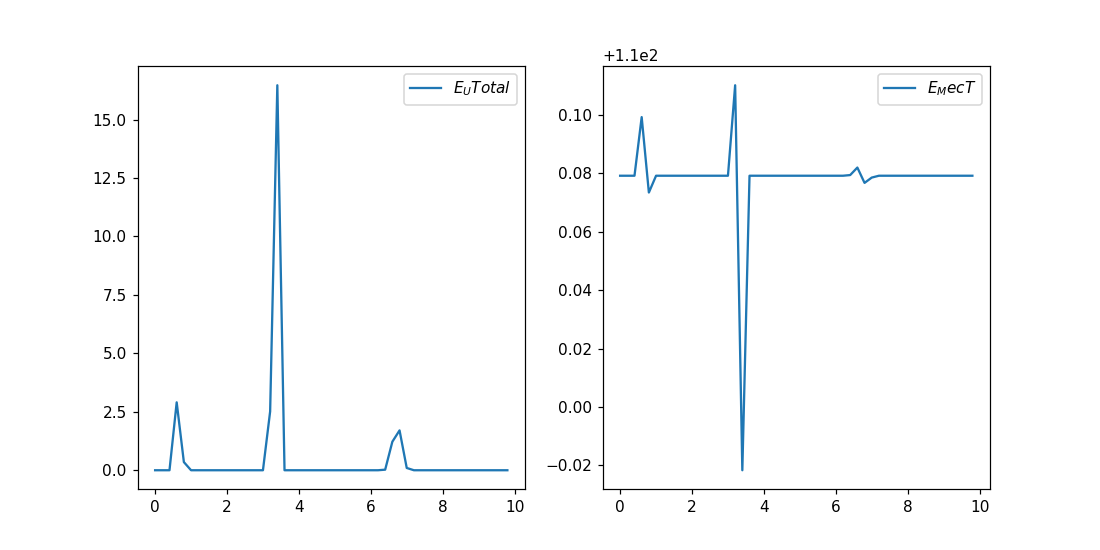

In [86]:
fig4 = plt.figure(figsize=(10,5))
ax5 = fig4.add_subplot(121)
ax5.plot(t1,PotentialT,label='$E_U Total$')
ax5.legend()


E_mecT=0.5*PotentialT+KineticT
ax6 = fig4.add_subplot(122)
ax6.plot(t1,E_mecT,label='$E_MecT$')
ax6.legend()

<IPython.core.display.Javascript object>


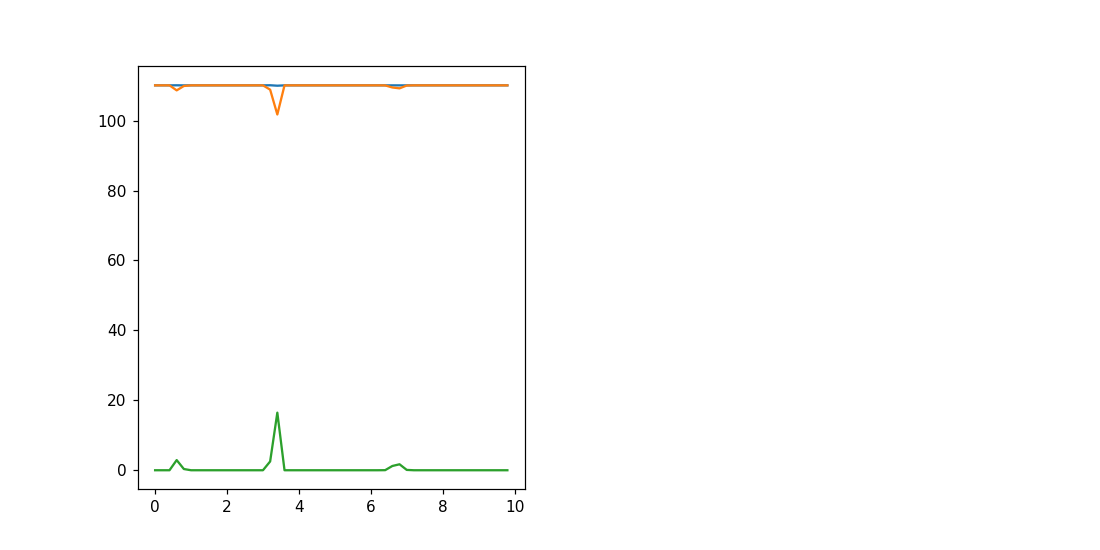

In [85]:
fig4 = plt.figure(figsize=(10,5))
ax5 = fig4.add_subplot(121)
ax5.plot(t1,E_mecT,label='$E_MecT$')
ax5.plot(t1,KineticT,label='$E_k Total$')
ax5.plot(t1,PotentialT,label='$E_U Total$')


In [ ]:
AngularMomentumT = Particles[0].GetAngularMomentum(scale)
for i in range(1,len(Particles)):
    AngularMomentumT = np.add(AngularMomentumT,Particles[i].GetAngularMomentum(scale))
    
fig5 = plt.figure(figsize=(8,5))
ax6 = fig5.add_subplot()
ax6.plot(t1,AngularMomentumT,label='$L_z Total$')




In [ ]:


Particles[1].Lz